In [84]:
import dynamiqs as dq
import jax.numpy as jnp
import jax
from dynamiqs import *
import matplotlib.pyplot as plt

import imageio


In [85]:
#parameters
pi=jnp.pi
N=10 #Hilbert space dimension
n=2 #number Fock state
alpha=2 #coherent state amplitude
g2=1.0
k_b=10
e_d=-4

T      = 4.0      # total time
n_steps = 80      # number frame
tlist  = jnp.linspace(0, T, n_steps)


In [86]:
#operators and states
a=destroy(N)
I  = eye(N)
a_sys  = tensor(a,  I)
adag_sys = a_sys.dag()
b_sys  = tensor(I,  a)
bdag_sys = b_sys.dag()
H=g2.conjugate()*adag_sys@adag_sys@b_sys+g2*a_sys@a_sys@bdag_sys+e_d.conjugate()*b_sys+e_d*bdag_sys

c_ops = [jnp.sqrt(k_b) * b_sys]

vacuum_state=tensor(basis(N,0), basis(N,0))

fock_state=fock(N, n)
coherent_state=coherent(N, alpha)
cat_state=1/jnp.sqrt(2)*(coherent(N,alpha)+coherent(N,-alpha))
cat_state_3=1/jnp.sqrt(3)*(coherent(N,alpha)+coherent(N,jnp.exp(1j*2*pi/3)*alpha)+coherent(N,jnp.exp(-1j*2*pi/3)*alpha))



In [87]:
#Wigner functions
"""gridspace=jnp.linspace(-5,5, 100)
W_fock = wigner(fock_state, xvec=gridspace, yvec=gridspace)
W_coherent = wigner(coherent_state, xvec=gridspace, yvec=gridspace)"""
W_coherent=wigner(coherent_state, 5,5)
W_fock2 = wigner(fock_state,5,5)


In [88]:
xvec, yvec, W_fock=W_fock2

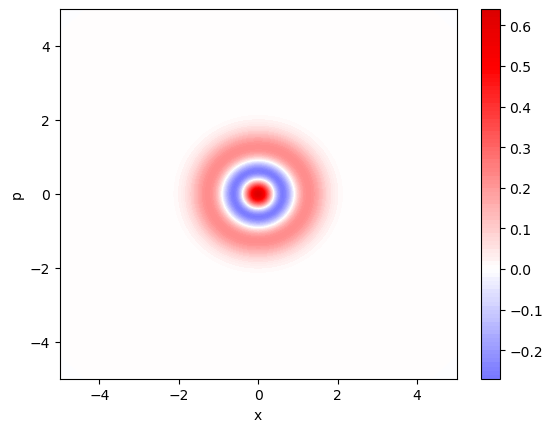

In [89]:
plt.contourf(xvec, yvec,W_fock, levels=100,cmap="seismic", vmax=1, vmin=-1)
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

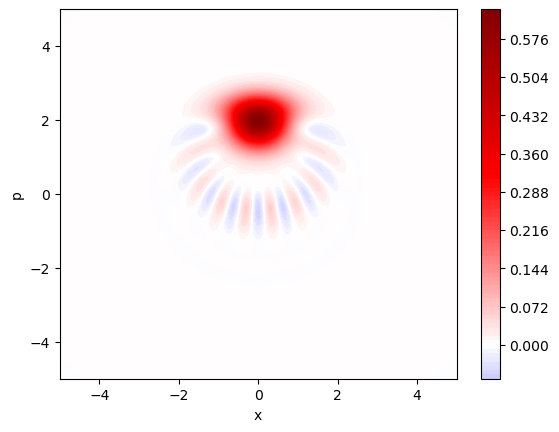

In [90]:
xvec,yvec, W_coherent=W_coherent
plt.contourf(xvec, yvec,W_coherent, levels=100,cmap="seismic", vmax=2/pi, vmin=-2/pi)
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

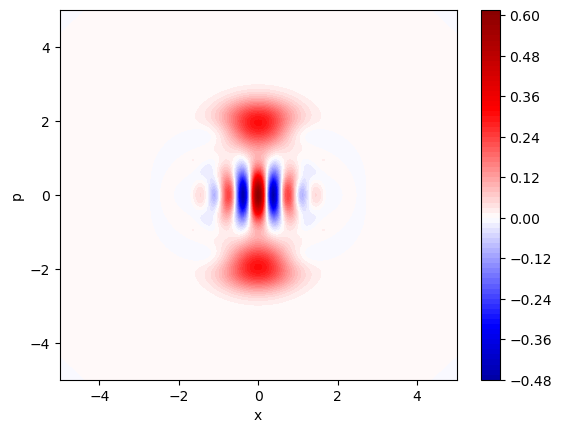

In [91]:
xvec,yvec, W_coherent=wigner(cat_state, 5,5)
plt.contourf(xvec, yvec,W_coherent, levels=100,cmap="seismic", vmax=2/pi, vmin=-2/pi)
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

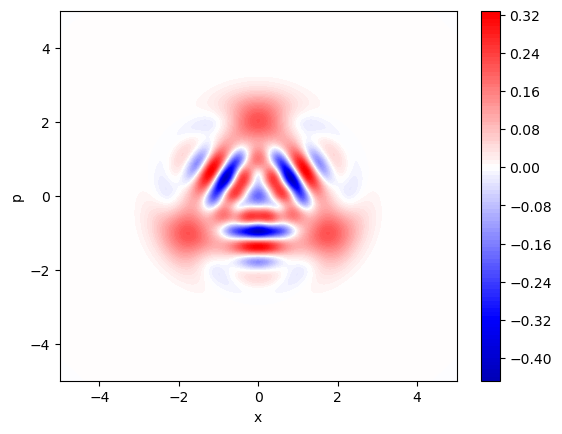

In [92]:
xvec,yvec, W_coherent=wigner(cat_state_3, 5,5)
plt.contourf(xvec, yvec,W_coherent, levels=100,cmap="seismic", vmax=2/pi, vmin=-2/pi)
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

In [83]:
result = mesolve(H, c_ops, vacuum_state, tlist)

filenames = []
for idx, rho_ab in enumerate(result.states):
    
    rho_a = rho_ab.ptrace(0)
    
    xvec, yvec, W = wigner(rho_a, 10, 10)

    # plot
    fig, ax = plt.subplots(figsize=(4,4))
    c = ax.contourf(xvec, yvec,W, levels=100,cmap="seismic", vmax=2/pi, vmin=-2/pi)
    ax.set_title(f"t = {tlist[idx]:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("p")

    # save frame
    fname = f"frame_{idx:03d}.png"
    plt.savefig(fname, dpi=100)
    plt.close(fig)
    filenames.append(fname)

# ─── BUILD GIF ────────────────────────────────────────────────────────────────
with imageio.get_writer('wigner_evolution.gif', mode='I', fps=10) as writer:
    for fname in filenames:
        image = imageio.imread(fname)
        writer.append_data(image)

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 240.26ms ◆ remaining 0.00ms  
/var/folders/r3/73vd52695015hgxl4_8nqdth0000gn/T/ipykernel_99170/2790071472.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fname)
